<a href="https://colab.research.google.com/github/fani-01/Emplyee-salary-prediction-using-machine-learning/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd

In [110]:
data=pd.read_csv("/large_employee_loan_salary.csv")

In [111]:
data.head()

,age,education,occupation,hours-per-week,experience,salary_class,monthly_income,loan_amount,loan_term,credit_score
0,26,Some-college,Tech-support,60,16,<=50K,108137,110611,12,302
1,41,Some-college,Tech-support,57,8,>50K,53129,408719,60,846
2,43,Assoc,HR,50,27,>50K,31357,360155,60,639
3,25,HS-grad,Tech-support,39,17,<=50K,116345,668506,12,764
4,56,Some-college,Tech-support,37,32,<=50K,72778,82873,36,687


In [112]:
data.tail()

,age,education,occupation,hours-per-week,experience,salary_class,monthly_income,loan_amount,loan_term,credit_score
4995,42,Masters,Engineer,43,29,>50K,53020,503355,36,360
4996,23,HS-grad,Engineer,59,30,<=50K,59173,565258,36,575
4997,46,HS-grad,Executive,48,4,>50K,57106,186605,36,421
4998,28,Assoc,Sales,39,24,<=50K,18116,251314,12,422
4999,34,HS-grad,HR,38,21,<=50K,101269,260222,36,771


In [113]:
data.shape

(5000, 10)

In [114]:
data.isna().sum()

,0
age,0
education,0
occupation,0
hours-per-week,0
experience,0
salary_class,0
monthly_income,0
loan_amount,0
loan_term,0
credit_score,0


In [115]:
print(data.occupation.value_counts())

occupation
Engineer        744
HR              742
Sales           716
Clerical        708
Manager         704
Executive       694
Tech-support    692
Name: count, dtype: int64


In [116]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Engineer        744
HR              742
Sales           716
Clerical        708
Manager         704
Executive       694
Tech-support    692
Name: count, dtype: int64


/tmp/ipython-input-116-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [117]:
print(data['occupation'].value_counts())

occupation
Engineer        744
HR              742
Sales           716
Clerical        708
Manager         704
Executive       694
Tech-support    692
Name: count, dtype: int64


In [118]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Engineer        744
HR              742
Sales           716
Clerical        708
Manager         704
Executive       694
Tech-support    692
Name: count, dtype: int64


In [119]:
data.shape

(5000, 10)

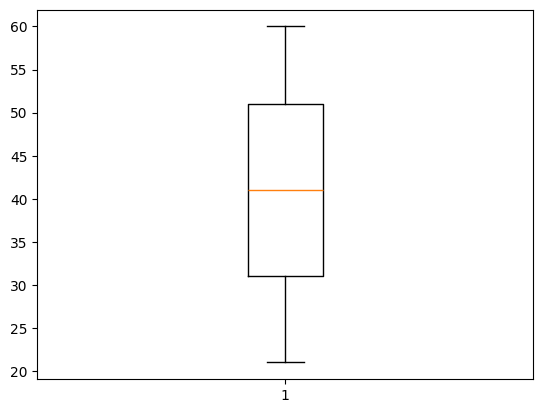

In [120]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [121]:
data=data[(data['age']<=75)&(data['age']>=17)]

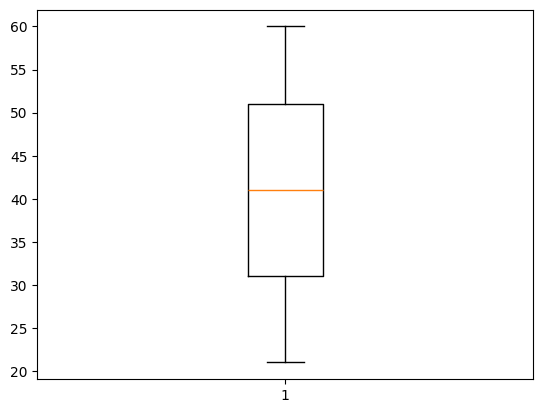

In [122]:
plt.boxplot(data['age'])
plt.show()

In [123]:
data.shape

(5000, 10)

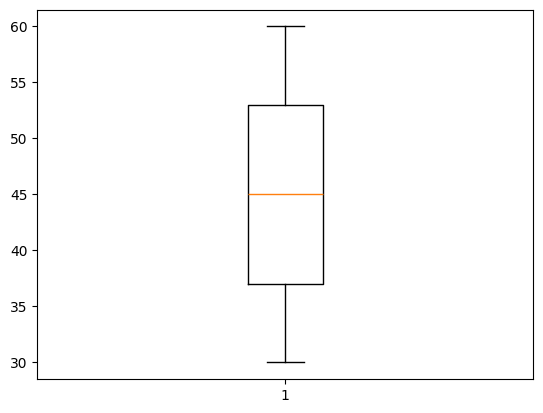

In [124]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [125]:
data.shape

(5000, 10)

In [126]:
data=data.drop(columns=['education'])

In [127]:
data

,age,occupation,hours-per-week,experience,salary_class,monthly_income,loan_amount,loan_term,credit_score
0,26,Tech-support,60,16,<=50K,108137,110611,12,302
1,41,Tech-support,57,8,>50K,53129,408719,60,846
2,43,HR,50,27,>50K,31357,360155,60,639
3,25,Tech-support,39,17,<=50K,116345,668506,12,764
4,56,Tech-support,37,32,<=50K,72778,82873,36,687
...,...,...,...,...,...,...,...,...,...
4995,42,Engineer,43,29,>50K,53020,503355,36,360
4996,23,Engineer,59,30,<=50K,59173,565258,36,575
4997,46,Executive,48,4,>50K,57106,186605,36,421
4998,28,Sales,39,24,<=50K,18116,251314,12,422


In [128]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['occupation']=encoder.fit_transform(data['occupation'])
data['salary_class'] = encoder.fit_transform(data['salary_class'])
data['experience'] = encoder.fit_transform(data['experience'])

In [129]:
data

,age,occupation,hours-per-week,experience,salary_class,monthly_income,loan_amount,loan_term,credit_score
0,26,6,60,15,0,108137,110611,12,302
1,41,6,57,7,1,53129,408719,60,846
2,43,3,50,26,1,31357,360155,60,639
3,25,6,39,16,0,116345,668506,12,764
4,56,6,37,31,0,72778,82873,36,687
...,...,...,...,...,...,...,...,...,...
4995,42,1,43,28,1,53020,503355,36,360
4996,23,1,59,29,0,59173,565258,36,575
4997,46,2,48,3,1,57106,186605,36,421
4998,28,5,39,23,0,18116,251314,12,422


In [130]:
x=data.drop(columns=['monthly_income'])
y=data['monthly_income']
x

,age,occupation,hours-per-week,experience,salary_class,loan_amount,loan_term,credit_score
0,26,6,60,15,0,110611,12,302
1,41,6,57,7,1,408719,60,846
2,43,3,50,26,1,360155,60,639
3,25,6,39,16,0,668506,12,764
4,56,6,37,31,0,82873,36,687
...,...,...,...,...,...,...,...,...
4995,42,1,43,28,1,503355,36,360
4996,23,1,59,29,0,565258,36,575
4997,46,2,48,3,1,186605,36,421
4998,28,5,39,23,0,251314,12,422


In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv("/large_employee_loan_salary.csv")

# Encode categorical columns
encoder = LabelEncoder()
data['education'] = encoder.fit_transform(data['education'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['salary_class'] = encoder.fit_transform(data['salary_class'])

# Check class distribution
print("Class distribution:\n", data['salary_class'].value_counts())

# Features and target
X = data.drop('salary_class', axis=1)
y = data['salary_class']

# Stratified train-test split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier()
}

# Evaluate models
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))


Class distribution:
 salary_class
0    2554
1    2446
Name: count, dtype: int64

LogisticRegression Accuracy: 0.5060
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       511
           1       0.50      0.51      0.50       489

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000


RandomForest Accuracy: 0.4970
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       511
           1       0.48      0.43      0.46       489

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.50      0.50      0.49      1000


KNN Accuracy: 0.4990
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       511
           1       0.49      0.48      0.48       489

    accuracy

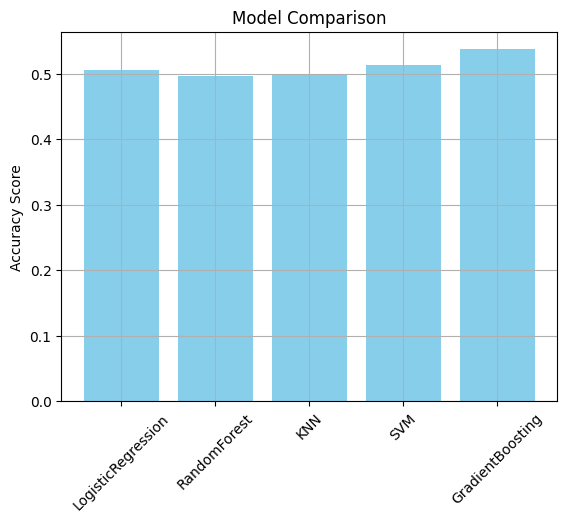

In [132]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 1.0000
RandomForest: 1.0000
KNN: 0.5100
SVM: 0.4810
GradientBoosting: 1.0000

✅ Best model: LogisticRegression with accuracy 1.0000
✅ Saved best model as best_model.pkl


In [134]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib


df = pd.DataFrame({
    'monthly_income': [30000, 50000, 15000, 60000, 25000, 45000, 35000, 70000, 22000, 55000],
    'loan_amount': [200000, 500000, 100000, 300000, 150000, 250000, 220000, 600000, 180000, 400000],
    'loan_term': [36, 60, 24, 60, 12, 48, 36, 60, 24, 60],
    'credit_score': [700, 750, 620, 800, 680, 710, 690, 770, 640, 760],
    'eligible': [1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
})

# Features and target
X = df[['monthly_income', 'loan_amount', 'loan_term', 'credit_score']]
y = df['eligible']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the model
joblib.dump(model, 'loan_model.pkl')
print("Model saved as loan_model.pkl")



Model Accuracy: 1.00
Model saved as loan_model.pkl


In [135]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import joblib


df = pd.DataFrame({
    'age': [25, 35, 45, 28, 50],
    'education': ['Bachelors', 'Masters', 'PhD', 'HS-grad', 'Bachelors'],
    'occupation': ['Sales', 'Manager', 'Engineer', 'HR', 'Engineer'],
    'hours-per-week': [40, 50, 60, 35, 45],
    'experience': [2, 10, 20, 3, 15],
    'salary_class': ['<=50K', '>50K', '>50K', '<=50K', '>50K']
})


df['education'] = df['education'].astype('category').cat.codes
df['occupation'] = df['occupation'].astype('category').cat.codes

X = df.drop('salary_class', axis=1)
y = df['salary_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [136]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib


salary_model = joblib.load("best_model.pkl")
loan_model = joblib.load("loan_model.pkl")


education_map = {
    'Bachelors': 0, 'HS-grad': 1, 'Masters': 2, 'PhD': 3,
    'Some-college': 4, 'Assoc': 5
}

occupation_map = {
    'Sales': 0, 'Manager': 1, 'Engineer': 2, 'HR': 3,
    'Tech-support': 4, 'Craft-repair': 5, 'Other-service': 6,
    'Exec-managerial': 7, 'Prof-specialty': 8, 'Handlers-cleaners': 9,
    'Machine-op-inspct': 10, 'Adm-clerical': 11, 'Farming-fishing': 12,
    'Transport-moving': 13, 'Priv-house-serv': 14, 'Protective-serv': 15,
    'Armed-Forces': 16
}

st.set_page_config(page_title="Employee Assistant App", page_icon="💼", layout="centered")

st.title("💼 Employee Assistant App")
st.markdown("This app helps with:")
st.markdown("- 📈 Predicting whether an employee earns **>50K or ≤50K**")
st.markdown("- 💳 Checking **loan eligibility**")


st.sidebar.title("🔍 Select Function")
app_mode = st.sidebar.radio("Choose an option", ["Salary Classification", "Loan Eligibility", "Batch Prediction"])


if app_mode == "Salary Classification":
    st.header("📈 Salary Classification")
    st.markdown("Fill the employee details to predict if salary is >50K or ≤50K")

    age = st.slider("Age", 18, 65, 30)
    education = st.selectbox("Education Level", list(education_map.keys()))
    occupation = st.selectbox("Job Role", list(occupation_map.keys()))
    hours_per_week = st.slider("Hours per Week", 1, 80, 40)
    experience = st.slider("Years of Experience", 0, 40, 5)

    salary_input = pd.DataFrame({
        'age': [age],
        'education': [education_map[education]],
        'occupation': [occupation_map[occupation]],
        'hours-per-week': [hours_per_week],
        'experience': [experience]
    })

    st.write("### 🔎 Input Data")
    st.write(salary_input)

    if st.button("Predict Salary Class"):
        salary_pred = salary_model.predict(salary_input)
        st.success(f"✅ Prediction: {salary_pred[0]}")


elif app_mode == "Loan Eligibility":
    st.header("💳 Loan Eligibility Checker")
    st.markdown("Enter your financial details to check eligibility")

    income = st.number_input("Monthly Income (₹)", 1000, 200000, step=1000)
    loan_amount = st.number_input("Desired Loan Amount (₹)", 5000, 1000000, step=5000)
    loan_term = st.selectbox("Loan Term (months)", [12, 24, 36, 60])
    credit_score = st.slider("Credit Score (300 - 850)", 300, 850, 650)

    loan_input = pd.DataFrame({
        'monthly_income': [income],
        'loan_amount': [loan_amount],
        'loan_term': [loan_term],
        'credit_score': [credit_score]
    })

    st.write("### 🧾 Input Data")
    st.write(loan_input)

    if st.button("Check Loan Eligibility"):
        loan_pred = loan_model.predict(loan_input)[0]
        if loan_pred == 1:
            st.success("🎉 You are eligible for the loan.")
        else:
            st.error("❌ You are not eligible for the loan.")


elif app_mode == "Batch Prediction":
    st.header("📂 Batch Salary Classification")
    st.markdown("Upload a CSV file for bulk predictions.")

    uploaded_file = st.file_uploader("Upload CSV", type="csv")

    if uploaded_file:
        batch_data = pd.read_csv(uploaded_file)
        st.write("🔍 Uploaded Preview:")
        st.write(batch_data.head())

        try:

            batch_data['education'] = batch_data['education'].map(education_map)
            batch_data['occupation'] = batch_data['occupation'].map(occupation_map)

            preds = salary_model.predict(batch_data)
            batch_data['PredictedSalaryClass'] = preds
            st.write("✅ Predictions:")
            st.write(batch_data)

            csv = batch_data.to_csv(index=False).encode('utf-8')
            st.download_button("📥 Download Results", csv, "salary_predictions.csv", "text/csv")
        except Exception as e:
            st.error(f"Prediction error: {e}")


Overwriting app.py


In [137]:
!pip install streamlit pyngrok

In [138]:
!ngrok authtoken 30ApYW4mLfx6g4Xw8g2VW93OXcw_3Nhaq5yZukUNfKbS3TRnu

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [139]:
import os
import threading

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()



In [140]:
!pkill -f ngrok


In [141]:
from pyngrok import ngrok
import time

time.sleep(5)
public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:",public_url)

Your Streamlit app is live here: NgrokTunnel: "https://d9ef1f388ba3.ngrok-free.app" -> "http://localhost:8501"
